In [1]:
import os
os.chdir('..')
print(os.getcwd())

/Users/Placebo/OMSCS/CS7641-ML/MachineLearningProjects/ReinforcementLearning


In [2]:
import pandas as pd
import numpy as np
import pickle
from bettermdptools.utils.plots import Plots

In [3]:
%load_ext autoreload
%autoreload 2
from src.experiments.blackjack_exp import BlackjackExperiment

# VI and PI Grid Search

In [ ]:
blackjack_exp = BlackjackExperiment(env_name='blackjack_200',
                                    result_dir='results',
                                    fig_dir='figs',
                                    random_seed =17)

params = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 0.99, 0.999, 1.0],
    'theta': [0.1, 0.01, 0.001, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14, 1e-16]
}

blackjack_exp.run_vi_pi_grid_search(params=params,
                                    test_iters=200,
                                    verbose=False,
                                    log_name='pi_vi_grid_search_200')

In [ ]:
blackjack_exp = BlackjackExperiment(env_name='blackjack_1000',
                                    result_dir='results',
                                    fig_dir='figs',
                                    random_seed =17)

params = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 0.99, 0.999, 1.0],
    'theta': [0.1, 0.01, 0.001, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14, 1e-16]
}

blackjack_exp.run_vi_pi_grid_search(params=params,
                                    test_iters=1000,
                                    verbose=False,
                                    log_name='pi_vi_grid_search_1000')

# Q Learning Grid Search

In [ ]:
blackjack_exp = BlackjackExperiment(env_name='blackjack_q_200_n10000',
                                    result_dir='results',
                                    fig_dir='figs',
                                    random_seed =17)

params = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 0.99, 0.999, 1.0],
    'init_alpha': np.round(np.linspace(0.2, 1.0, 5), 1),
    'init_epsilon': np.round(np.linspace(0.2, 1.0, 5), 1),
    'n_episodes': [10000]
}
blackjack_exp.run_q_learning_grid_search(params=params,
                                        test_iters=200,
                                        verbose=False,
                                        log_name='q_learning_grid_search_200')

# SARSA Grid Search

In [ ]:
blackjack_exp = BlackjackExperiment(env_name='blackjack_sarsa_200_n10000',
                                    result_dir='results',
                                    fig_dir='figs',
                                    random_seed =17)

params = {
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7, 0.8, 0.9, 0.99, 0.999, 1.0],
    'init_alpha': np.round(np.linspace(0.2, 1.0, 5), 1),
    'init_epsilon': np.round(np.linspace(0.2, 1.0, 5), 1),
    'n_episodes': [10000]
}
blackjack_exp.run_sarsa_learning_grid_search(params=params,
                                        test_iters=200,
                                        verbose=False,
                                        log_name='sarsa_learning_grid_search_200')

# Analysis of the results

In [7]:
from src.utils.plotting import set_plot_style
import matplotlib.pyplot as plt

In [8]:
import gymnasium as gym
from bettermdptools.envs.blackjack_wrapper import BlackjackWrapper

## VI and PI
Compared the max value for the same parameter combinations

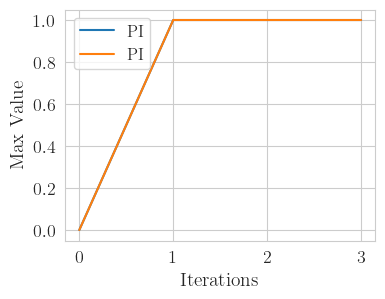

In [9]:
with open('results/blackjack_200/pi_grid_search_results.pkl', 'rb') as f:
    pi_results = pickle.load(f)

with open('results/blackjack_200/vi_grid_search_results.pkl', 'rb') as f:
    vi_results = pickle.load(f)

pi_iteration_results = pd.DataFrame(pi_results['iteration_results'])
vi_iteration_results = pd.DataFrame(vi_results['iteration_results'])

gamma = 0.3
theta = 0.1
pi_results = pi_iteration_results[(pi_iteration_results['gamma'] == gamma) & (pi_iteration_results['theta'] == theta)]
vi_results = vi_iteration_results[(vi_iteration_results['gamma'] == gamma) & (vi_iteration_results['theta'] == theta)]
pi_max_values = pi_results['max_values'].values[0]
vi_max_values = vi_results['max_values'].values[0]

# draw
set_plot_style()
plt.plot(pi_max_values, label='PI')
plt.plot(vi_max_values, label='PI')
plt.xlabel('Iterations')
plt.ylabel('Max Value')
plt.legend()
# save
plt.savefig('figs/blackjack_200/pi_vi_max_values.png')


## Q Learning

In [17]:
with open('results/blackjack_q_200_n10000/q_learning_grid_search_results.pkl', 'rb') as f:
    q_results = pickle.load(f)
q_results = pd.DataFrame(q_results['iteration_results'])
q_results.sort_values('mean_reward', ascending=False).iloc[0]

runtime                                                         0.753604
mean_reward                                                        0.225
std_reward                                                      0.924324
Q                      [[-0.0241720094444334, -0.021449364664642773],...
V                      [-0.021449364664642773, 0.01, 0.52916432572188...
pi                     {0: 1, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: ...
mean_values            [0.0013793103448275863, 0.0013793103448275863,...
max_values             [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, ...
delta_values           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013705787721...
gamma                                                               0.99
init_alpha                                                           0.4
min_alpha                                                           0.01
alpha_decay_ratio                                                    0.5
init_epsilon                                       

## SARSA

In [19]:
with open('results/blackjack_sarsa_200_n10000/sarsa_learning_grid_search_results.pkl', 'rb') as f:
    sarsa_results = pickle.load(f)
sarsa_iteration_results = pd.DataFrame(sarsa_results['iteration_results'])

sarsa10000 = sarsa_iteration_results[sarsa_iteration_results['n_episodes'] == 10000].sort_values('mean_reward', ascending=False)
sarsa10000.iloc[0]

runtime                                                         0.876749
mean_reward                                                         0.18
std_reward                                                      0.947418
Q                      [[-0.03173043651117414, -0.016883916523642673]...
V                      [-0.016883916523642673, 0.023403639136651437, ...
pi                     {0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 1, 6: 1, 7: ...
mean_values            [0.0, 0.0, 0.0, 0.0, 0.0, 0.002745975462519550...
max_values             [0.0, 0.0, 0.0, 0.0, 0.0, 0.7963328841306696, ...
delta_values           [0.0, 0.0, 0.0, 0.0, 0.0027459754625195503, 0....
gamma                                                                0.7
init_alpha                                                           0.8
min_alpha                                                           0.01
alpha_decay_ratio                                                    0.5
init_epsilon                                       

In [18]:
with open('results/blackjack_sarsa_200_n10000/sarsa_learning_grid_search_results.pkl', 'rb') as f:
    sarsa_results = pickle.load(f)
sarsa_iteration_results = pd.DataFrame(sarsa_results['iteration_results'])

sarsa10000 = sarsa_iteration_results[sarsa_iteration_results['n_episodes'] == 10000].sort_values('mean_reward', ascending=False)
sarsa10000.iloc[0]

runtime                                                         0.876749
mean_reward                                                         0.18
std_reward                                                      0.947418
Q                      [[-0.03173043651117414, -0.016883916523642673]...
V                      [-0.016883916523642673, 0.023403639136651437, ...
pi                     {0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 1, 6: 1, 7: ...
mean_values            [0.0, 0.0, 0.0, 0.0, 0.0, 0.002745975462519550...
max_values             [0.0, 0.0, 0.0, 0.0, 0.0, 0.7963328841306696, ...
delta_values           [0.0, 0.0, 0.0, 0.0, 0.0027459754625195503, 0....
gamma                                                                0.7
init_alpha                                                           0.8
min_alpha                                                           0.01
alpha_decay_ratio                                                    0.5
init_epsilon                                       